In [44]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"D:\model_with_flask\dataset.csv")
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Verified,Business,#Posts,#Followers,#Following,Fake
0,1,0.000,2,42,1,0,0,111,688,409,0
1,1,0.067,2,0,0,0,0,58,353,456,0
2,1,0.000,0,0,0,0,0,44,535,364,0
3,1,0.000,2,14,0,0,1,81,3109,298,0
4,1,0.000,2,0,0,0,1,498,1071,1999,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.308,1,0,0,0,0,0,87,4609,1
996,1,0.000,3,75,0,0,0,1,103,159,1
997,1,0.000,1,0,0,0,0,0,88,322,1
998,0,0.000,1,0,0,0,0,0,929,1315,1


In [45]:
X=df.iloc[:, 0:10].values
X[0]

array([  1.,   0.,   2.,  42.,   1.,   0.,   0., 111., 688., 409.])

In [46]:
y=df[['Fake']]
y

,Fake
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

670 670
330 330


In [48]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [49]:
clf.fit(X_train, y_train.values.ravel()) 

AdaBoostClassifier(n_estimators=100, random_state=0)

In [50]:
print("TRAIN SET", clf.score(X_train, y_train))
print("TEST  SET", clf.score(X_test, y_test))

TRAIN SET 1.0
TEST  SET 0.9727272727272728


In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y.values.ravel(), cv=4)
scores

array([0.984, 0.932, 0.956, 0.924])

In [52]:
print("Average: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average: 0.95 (+/- 0.05)


In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [54]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Real','Fake']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[160   5]
 [  4 161]]


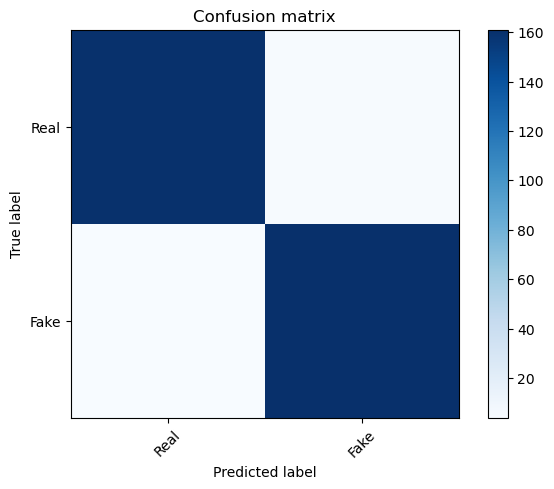

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)
plot_confusion_matrix(cm)

In [56]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0.         0.03030303 1.        ]
True Positive rate:  [0.         0.97575758 1.        ]


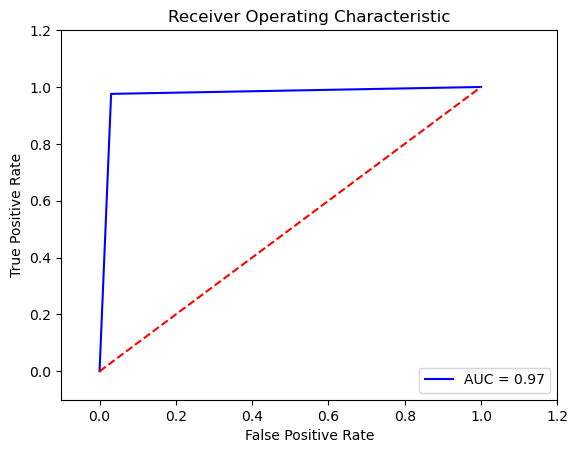

In [57]:
plot_roc_curve(y_test, clf.predict(X_test))

In [58]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       165
           1       0.97      0.98      0.97       165

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0)
adaboost_model.fit(X_train, y_train)


c:\Users\bhati\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\bhati\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [60]:
y_pred = adaboost_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        96
           1       0.96      0.96      0.96       104

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [61]:
import pickle
# Assuming adaboost_model is your trained AdaBoost model
with open('adaboost_model.pkl', 'wb') as model_file:
    pickle.dump(adaboost_model, model_file)
